In [4]:
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import datasets, layers, losses
from keras.utils.generic_utils import get_custom_objects
from tensorflow import keras
from keras.layers import Activation
from tensorflow.keras.utils import to_categorical
import numpy as np

!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


In [5]:
N = 2000
X, y = make_circles(N, noise=0.04, random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

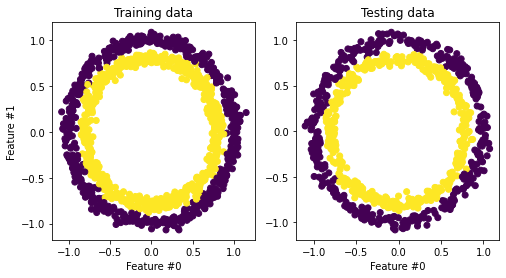

In [6]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

## شبکه را بدون تابع فعال‌سازی در لایه‌های آن ایجاد میکنیم

In [8]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, kernel_initializer='he_uniform'),
      layers.Dense(8, kernel_initializer='he_uniform'),
      layers.Dense(2, kernel_initializer='he_uniform'),
      layers.Dense(1, kernel_initializer='he_uniform')              
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 2)                 18        
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 9ms/step - loss: 6.0697e-08 - accuracy: 0.4900 - val_loss: 5.7966e-08 - val_accuracy: 0.4913
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4900 - val_loss: 5.7966e-08 - val_accuracy: 0.4913
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4900 - val_loss: 5.7966e-08 - val_accuracy: 0.4913
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4900 - val_loss: 5.7966e-08 - val_accuracy: 0.4913
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4900 - val_loss: 5.7966e-08 - val_accuracy: 0.4913
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4900 - val_loss: 5.7966e-08 - val_accuracy: 0.4913
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4900 - val_loss

## در قسمت قبل چون تابع‌ فعال‌سازی‌ای وجود ندارد دقت الگوریتم در ایپاک‌های مختلف هیچ بهبودی پیدا نمیکند و از حالت رندوم ۵۰ درصد بیشتر نمیشود. عملا مدل با شیر یا خط تصادفی تفاوتی نمیکند.
## حال با یک تابع فعال‌سازی خطی امتحان میکنیم

In [11]:
get_custom_objects().update({'linear_activation': Activation(lambda x:3*x+1)})

In [13]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "linear_activation", kernel_initializer='he_uniform')              
])
model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 9ms/step - loss: 6.0697e-08 - accuracy: 0.4833 - val_loss: 5.7966e-08 - val_accuracy: 0.4875
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4833 - val_loss: 5.7966e-08 - val_accuracy: 0.4875
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4833 - val_loss: 5.7966e-08 - val_accuracy: 0.4875
Epoch 4/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4833 - val_loss: 5.7966e-08 - val_accuracy: 0.4875
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 6.0697e-08 - accuracy: 0.4833 - val_loss: 5.7966e-08 - val_accuracy: 0.4875
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4833 - val_loss: 5.7966e-08 - val_accuracy: 0.4875
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4833 - val_loss

## در اینجا هم دقت از حدود ۵۰ درصد که عملا رندوم است فراتر نمیرود زیرا هیچ پیچیدگی‌ای وجود ندارد در این تابع

## حال از یک لاس فانکشن مناسب برای رگرشن استفاده میکنیم

In [14]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "linear_activation", kernel_initializer='he_uniform')              
])

In [15]:
model.compile(optimizer='adam', loss=losses.MeanSquaredError(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 11ms/step - loss: 13430.0713 - accuracy: 0.4958 - val_loss: 2081.4890 - val_accuracy: 0.4313
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 728.2722 - accuracy: 0.4842 - val_loss: 80.0874 - val_accuracy: 0.5138
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 15.8238 - accuracy: 0.4942 - val_loss: 0.5523 - val_accuracy: 0.5200
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.3822 - accuracy: 0.5267 - val_loss: 0.2780 - val_accuracy: 0.5387
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2572 - accuracy: 0.5208 - val_loss: 0.2511 - val_accuracy: 0.4963
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.5033 - val_loss: 0.2522 - val_accuracy: 0.5113
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.5050 - val_loss: 0.2504 - val_accuracy: 0.5075
Epoch 8/

## باز هم به دلیل تابع فعالسازی خطی نامناسب بهبودی ایجاد نمیشود.

## حال یک شبکه عصبی تنها با یک لایه ولی تعداد دلخواهی نورون ایجاد میکنیم

In [17]:
model = keras.Sequential ([
      layers.Dense(8, input_dim=2, activation = "linear_activation", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "linear_activation", kernel_initializer='he_uniform')              
])
model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 8ms/step - loss: 6.0697e-08 - accuracy: 0.4983 - val_loss: 5.7966e-08 - val_accuracy: 0.4975
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4983 - val_loss: 5.7966e-08 - val_accuracy: 0.4975
Epoch 3/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4983 - val_loss: 5.7966e-08 - val_accuracy: 0.4975
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4983 - val_loss: 5.7966e-08 - val_accuracy: 0.4975
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 6.0697e-08 - accuracy: 0.4983 - val_loss: 5.7966e-08 - val_accuracy: 0.4975
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4983 - val_loss: 5.7966e-08 - val_accuracy: 0.4975
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 6.0697e-08 - accuracy: 0.4983 - val_loss

## باز هم به نتیجه‌ی مطلوبی نمیرسیم

## حال نرخ یادگیری را تغییر میدهیم با تابع فعالسازی RELU

نرخ یادگیری = 0.001

In [18]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "sigmoid", kernel_initializer='he_uniform')              
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 0.9468 - accuracy: 0.4925 - val_loss: 0.8430 - val_accuracy: 0.4837
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7881 - accuracy: 0.4817 - val_loss: 0.7620 - val_accuracy: 0.4712
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7434 - accuracy: 0.4733 - val_loss: 0.7317 - val_accuracy: 0.4850
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.7239 - accuracy: 0.4825 - val_loss: 0.7165 - val_accuracy: 0.4800
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7124 - accuracy: 0.4842 - val_loss: 0.7068 - val_accuracy: 0.4787
Epoch 6/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7043 - accuracy: 0.4592 - val_loss: 0.7000 - val_accuracy: 0.4750
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.4558 - val_loss: 0.6937 - val_accuracy: 0.4737
Epoch 8/10
38/38 [==

نرخ یادگیری = ۲۰

In [19]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "sigmoid", kernel_initializer='he_uniform')              
])
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 20), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 5861.3252 - accuracy: 0.5125 - val_loss: 1.1390 - val_accuracy: 0.4863
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.8839 - accuracy: 0.4775 - val_loss: 1.1269 - val_accuracy: 0.4863
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.9951 - accuracy: 0.4892 - val_loss: 0.7740 - val_accuracy: 0.4863
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8761 - accuracy: 0.4692 - val_loss: 0.8653 - val_accuracy: 0.4863
Epoch 5/10
38/38 [==============================] - 0s 4ms/step - loss: 0.7522 - accuracy: 0.5042 - val_loss: 0.6943 - val_accuracy: 0.5138
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.8082 - accuracy: 0.5025 - val_loss: 0.7497 - val_accuracy: 0.4863
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.9390 - accuracy: 0.4758 - val_loss: 0.7387 - val_accuracy: 0.5138
Epoch 8/10
38/38 

هیچ یک از دو مقدار یک هزارم و بیست به خوبی جواب نداد پس مقداری بین آن‌ها انتخاب میکنیم مثلا 0.01

In [24]:
model = keras.Sequential ([
      layers.Dense(16, input_dim=2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(8, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(2, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(1, activation = "sigmoid", kernel_initializer='he_uniform')              
])

In [25]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
38/38 [==============================] - 1s 7ms/step - loss: 0.6948 - accuracy: 0.5150 - val_loss: 0.6854 - val_accuracy: 0.5350
Epoch 2/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5250 - val_loss: 0.6787 - val_accuracy: 0.5275
Epoch 3/10
38/38 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.5700 - val_loss: 0.6560 - val_accuracy: 0.7312
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.6286 - accuracy: 0.6842 - val_loss: 0.5584 - val_accuracy: 0.7625
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8542 - val_loss: 0.3911 - val_accuracy: 0.9475
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.9450 - val_loss: 0.2325 - val_accuracy: 0.9775
Epoch 7/10
38/38 [==============================] - 0s 4ms/step - loss: 0.1974 - accuracy: 0.9750 - val_loss: 0.1937 - val_accuracy: 0.9475
Epoch 8/10
38/38 [==

به طور کلی برای انتخاب نرخ یادگیری مناسب بهتر است برنامه‌ای نوشته تا خود نرخ‌های یادگیری مهم و مرتبط را امتحان کرده و بهترین را خروجی دهد. حال اینجا ما اینکار را به شکل دستی انجام دادیم و در ابتدا یک مقدار بسیار کم و در ادامه مقداری زیاد قرار دادیم که هیچکدام مناسب نبودند پس متوجه شدیم باید مقداری بین آن‌ها باشد که با کمی سعی و خطا به 0.01 میرسیم.

# بخش دوم

4431872/4422102 [==============================] - 0s 0us/step


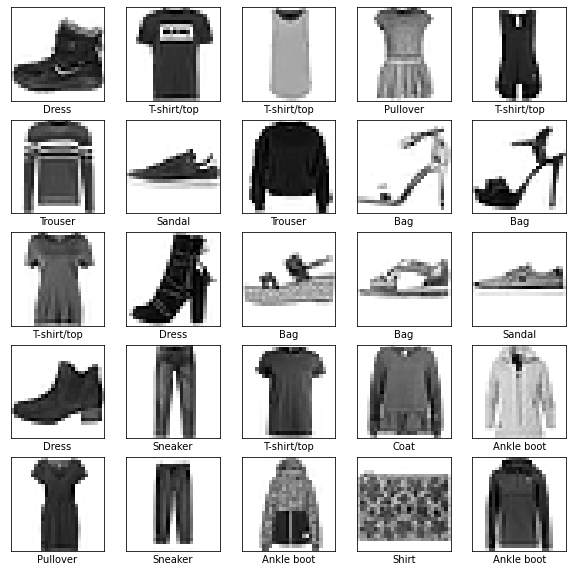

In [28]:
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top',
               'Sneaker', 
               'Trouser', 
               'Pullover',
               'Ankle boot',
               'Bag', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Dress', ]
X_train = X_train / 255.0
X_test = X_test / 255.0
utils.plot_multi_images(X_train, y_train, class_names)

In [30]:
model = keras.Sequential ([
      layers.Flatten(input_shape=(28, 28)),
      layers.Dense(256, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(128, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(64, activation = "relu", kernel_initializer='he_uniform'),
      layers.Dense(10, activation = "softmax", kernel_initializer='he_uniform')              
])

In [31]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 12, verbose = 0)
history = model.fit(X_train, y_train, validation_split=0.25, batch_size=32, epochs=10)

Epoch 1/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3765 - accuracy: 0.8712 - val_loss: 0.3752 - val_accuracy: 0.8725
Epoch 2/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3582 - accuracy: 0.8769 - val_loss: 0.3856 - val_accuracy: 0.8703
Epoch 3/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3759 - accuracy: 0.8739 - val_loss: 0.3626 - val_accuracy: 0.8758
Epoch 4/10
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3552 - accuracy: 0.8775 - val_loss: 0.3579 - val_accuracy: 0.8697
Epoch 5/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3463 - accuracy: 0.8786 - val_loss: 0.3631 - val_accuracy: 0.8709
Epoch 6/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3472 - accuracy: 0.8808 - val_loss: 0.3783 - val_accuracy: 0.8739
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3683 - accuracy: 0.8735 - val_loss: 0.4215 - val_accuracy:

In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4992 - accuracy: 0.8494
Test accuracy: 0.849399983882904


In [33]:
predictions = model.predict(X_test)

Confusion matrix


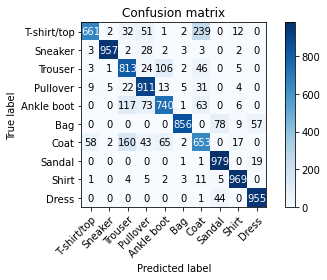

In [34]:
predicted_classes = utils.label_with_highest_prob(predictions)
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=y_test, classes=np.array(class_names))

این شبکه عملکرد مناسبی دارد زیرا هم تابع فعال‌سازی مناسبی داریم و از رلو استفاده کرده‌ایم و هم در لایه‌ی آخر از تابع فعال‌سازی سافتمکس که در چنین شرایطی انتخاب مناسبی است استفاده کرده‌ایم. 
دلیل دیگر عملکرد مناسب نرمال کردن اندازه‌ی پیکسل‌های عکس است.